In [1]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
import matplotlib.pyplot as plt # plotting library

In [9]:
def period(n):
    fib_list = ["a", "b"]*n
    return fib_list

L=18
Jr=1.0 # spin=spin interaction
h=0

In [12]:
TT=0.1
step=2
order=100

s=period(order)
basis = spin_basis_1d(L,pauli=False,m=0) 
i0 = basis.index("010101011001010101") # pick state from basis set
psi01 = np.zeros(basis.Ns,dtype=np.float64)
psi01[i0] = 1.0 # define state corresponding to the string "111000"
psi0=(psi01)
no_checks = dict(check_herm=False,check_symm=False,check_pcon=False)
n_list = [hamiltonian([["z",[[1.0,i]]]],[],basis=basis,dtype=np.float64,**no_checks) for i in range(L)]


Jr=1# spin ring

H0=[[-Jr,  4*i,(4*i+1),(4*i+2),(4*i+3)]  for i in range(L//4)] 
H1=[[-Jr,  4*i+2,(4*i+3),(4*i+4)%L,(4*i+5)%L]  for i in range(L//4)] 
H01=[[-h*i,2*i] for i in range(L//2)]
H02=[[-h*(i+1),2*i+1] for i in range(L//2)]

#print(H0,H1)

# static and dynamic lists
static0=[["+--+",H0],["-++-",H0], ["z",H01],["z",H02]]
static1=[["+--+",H1],["-++-",H1], ["z",H01],["z",H02]]
dynamic=[]
###### construct Hamiltonian
Hd0=hamiltonian(static0,dynamic,basis=basis,dtype=np.float64,**no_checks)
Hd1=hamiltonian(static1,dynamic,basis=basis,dtype=np.float64,**no_checks)

psitot=psi0
psiini=psi0
ent=[]
fide=[]
sd=[]
expt_n_t_sta1=[]
for i in range(len(s)):
    
    if i>0:
        psiini=psi_list[:,-1]
    if s[i] == 'a':
        tmax0=TT
        tlist0=np.linspace(0,tmax0,step)
        s[i] = tlist0[-1]
        psi_list=Hd0.evolve(psiini,0,tlist0)
        #ent=[]
        #fide=[]
    elif s[i] == 'b':
        tmax1=TT
        tlist1=np.linspace(0,tmax1,step)
        s[i] = tlist1[-1]
        psi_list=Hd1.evolve(psiini,0,tlist1)
        #ent=[]
        #fide=[]
        
    expt_n_t_sta1.append([n.expt_value(psi_list[:,-1]).real for n in n_list])

    print('i = % 3d | % 3d,'%(i, len(s)),end='\r')
            

expt_n_t_sta1=np.mat(expt_n_t_sta1)

C:\Anaconda3\envs\quspin\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: For X (41) and Y (10) with flat shading, the expected shape of A is (9, 40). Passing A ((1, 360)) is deprecated since 3.5 and will become an error two minor releases later.
  


(0.0, 5.0)

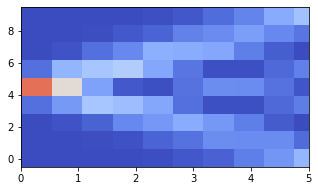

In [13]:
fig = plt.figure(figsize=[8,6],
                 facecolor='w')

ax1 = fig.add_axes([0.150,0.100,0.5,0.37])
xm, ym = np.meshgrid(np.linspace(-0.5,20.5,41),np.linspace(-0.5,9.5,10))
hd1=ax1.pcolormesh(xm,ym,expt_n_t_sta1.T[::2,::5],cmap='coolwarm',shading='flat')
ax1.set_xlim([0,5])

In [4]:

import pandas as pd


df = pd.DataFrame(expt_n_t_sta1)

df.to_csv('exno4fq.csv', index=False)

[[-1, 0, 1, 2, 3], [-1, 4, 5, 6, 7], [-1, 8, 9, 10, 11], [-1, 12, 13, 14, 15]] [[-1, 2, 3, 4, 5], [-1, 6, 7, 8, 9], [-1, 10, 11, 12, 13], [-1, 14, 15, 16, 17]]


C:\Anaconda3\envs\quspin\lib\site-packages\ipykernel_launcher.py:53: MatplotlibDeprecationWarning: For X (21) and Y (10) with flat shading, the expected shape of A is (9, 20). Passing A ((1, 180)) is deprecated since 3.5 and will become an error two minor releases later.


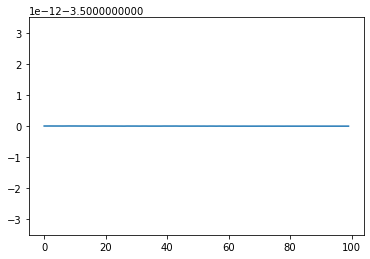

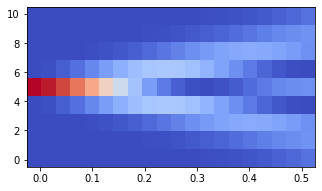

In [8]:

L=18# system size
basis = spin_basis_1d(L,pauli=False,m=0) 
#i0 = basis.index("0110010101") # pick state from basis set


i0 = basis.index("010101011001010101") # pick state from basis set
psi01 = np.zeros(basis.Ns,dtype=np.float64)
psi01[i0] = 1.0 # define state corresponding to the string "111000"
psi0=(psi01)

Jr=1# spin ring
##### construct basis in the 0-total momentum and +1-parity sector
# define PBC site-coupling lists for operators
H0=[[-Jr,  4*i,(4*i+1),(4*i+2),(4*i+3)]  for i in range(L//4)] 

H1=[[-Jr,  4*i+2,(4*i+3),(4*i+4)%L,(4*i+5)%L]  for i in range(L//4)] 
print(H0,H1)
no_checks = dict(check_herm=False,check_symm=False,check_pcon=False)
# static and dynamic lists
static0=[["+--+",H0],["-++-",H0],["+--+",H1],["-++-",H1]]

dynamic=[]
###### construct Hamiltonian
Hd0=hamiltonian(static0,dynamic,basis=basis,**no_checks)
#
ttol=2
step=100
tlist1=np.linspace(0,ttol,step)

psi_list=Hd0.evolve(psi0,0,tlist1)

n_list = [hamiltonian([["z",[[1.0,i]]]],[],basis=basis,dtype=np.float64,**no_checks) for i in range(L)]
expt_n_t_sta1 = np.vstack([n.expt_value(psi_list).real for n in n_list]).T
#print(expt_n_t_sta,psi_k)
# for i in range(L):
#     plt.plot(tlist1,expt_n_t_sta1[:,i],label=i)
# plt.legend(loc=[1.01,0])
# plt.ylim([-0.52,0.52])
aa=np.zeros(step)
for i in range(9):
    aa+=expt_n_t_sta1[:,2*i]
plt.plot(aa)
aaa=[]
for i in range(L):
    aaa.append(expt_n_t_sta1[:,i])
fig = plt.figure(figsize=[8,6],
                 facecolor='w')
aam0=np.mat(aaa)
#ax2 = fig.add_axes([0.63,0.700,0.32,0.265])
ax1 = fig.add_axes([0.150,0.100,0.5,0.37])

xm, ym = np.meshgrid(np.linspace(-0.5,10.5,21)/20,np.linspace(-0.5,10.5,10))
hd1=ax1.pcolormesh(xm,ym,aam0[::2,::5],cmap='coolwarm',shading='flat')

In [6]:
aaa=[]
for i in range(L):
    aaa.append(expt_n_t_sta1[:,i])
import pandas as pd


df = pd.DataFrame(aaa)

df.to_csv('exno4e.csv', index=False)
